In [4]:
import os
os.chdir('/Users/isabe/OneDrive/MATH586_Jupyter/ResearchReport')


In [ ]:
import matplotlib.pyplot as plt

styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [4]:
import numpy as np
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba

def newColMap(colors):
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.mlab as mlab
import pandas as pd

#from cartopy import crs, mpl
#import matplotlib.ticker as mticker
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from mpl_toolkits import mplot3d
#import netCDF4
#from netCDF4 import Dataset as ds
from urllib import request
import scipy as sp
from scipy import stats as stt
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity as kd
from sklearn.linear_model import LinearRegression
from random import randint
from scipy.stats import norm
import statsmodels
import sklearn
import math
import statistics
import sympy as sy
from sympy import symbols, diff
import statsmodels.api as sm
from datetime import date

# **The Basis for the Code I am going to Create with the New Datasets:**

You can just ignore this section

In [ ]:
Miami = datas + "MiamiPrecip.csv" #1948-2025
NewYork = datas + "NYNYPrecip.csv"
Seattle = datas + "SeattlePrecip.csv" #1948-2025
Dallas = datas + "DallasPrecip.csv" #
SanDiego = datas + "SDCAPrecip.csv"
MIA = pd.read_csv(Miami)
NY = pd.read_csv(NewYork)
SEA = pd.read_csv(Seattle)
DAL = pd.read_csv(Dallas)
SD = pd.read_csv(SanDiego)

In [ ]:
SD
column_names = SD.columns.tolist()
print(column_names)


In [ ]:
DAL.iloc[:, [1, 'PRCP']]

In [ ]:
SDp = SD.iloc[:, [1, 70]]
SDP = SD.iloc[:, 70].values
Jansdp = SDp.iloc[6::12] #Indexing Januaries
jansdp = Jansdp.iloc[11:71] #finding Januaries from 1951-2010
JanSDP = jansdp.iloc[:,1] #This is all SD Jan Precip data in an array 1951-2010
JanSDP2 = jansdp.iloc[20:50,:]
JANSDP2 = JanSDP2.iloc[:,1].values #SD from 1971-2000
nyp = NY.iloc[::12,[1,72]]
Nyp = nyp.iloc[82:142,:]
JanNYP = Nyp.iloc[:,1] #Jan Prec Data in NY array from 1951-2010
JanNYP2 = Nyp.iloc[20:50,1].values #NY from 71-2000
mia = MIA.iloc[:,70:]
miap = MIA.iloc[:,[1,70]]
Miap = miap.iloc[::12,:]
MIap = Miap.iloc[3:63]
JanMp = MIap.iloc[:,1] #Jan Prec Data in MIA array from 1951-2010
JanMP2 = MIap.iloc[20:50,1].values #MIAmi 1971-2000
sea = SEA.iloc[::12,[1,70]]
SeaP = sea.iloc[3:63,:]
JanSeap = SeaP.iloc[:,1] #Jan Prec Data in SEA array from 1951-2010
JANSEA2 = SeaP.iloc[20:50,1].values #Seattle 1971-2000
dal = DAL.iloc[137::12,[1,70]]
Dalp = dal.iloc[:60,:]
JanDalp = Dalp.iloc[:,1]#Jan Prec in DAL 1951-2010
JANDAL2 = Dalp.iloc[20:50,1].values

In [ ]:
prcp50_dict = {
    "San Diego": JanSDP.values,
    "New York": JanNYP.values,
    "Miami": JanMp.values,
    "Seattle": JanSeap.values,
    "Dallas": JanDalp.values
}
pyears = [str(year) for year in range(1951, 2011)]


PRCP50 = pd.DataFrame(prcp50_dict, index=pyears)


print(PRCP50)

In [ ]:
JSDP2 = np.array(JANSDP2)
JNYP2 = np.array(JanNYP2)
JMP2 = np.array(JanMP2)
JSEA2 = np.array(JANSEA2)
JDAL2 = np.array(JANDAL2)

# Compute the mean for each city
mean_SDP = np.mean(JSDP2)
mean_NYP = np.mean(JNYP2)
mean_MP = np.mean(JMP2)
mean_SEA = np.mean(JSEA2)
mean_DAL = np.nanmean(JDAL2) #Dallas Preciptation had one nan in 1998

print("Mean precipitation from 1971-2000:")
print(f"San Diego: {mean_SDP:.3f}")
print(f"New York: {mean_NYP:.3f}")
print(f"Miami: {mean_MP:.3f}")
print(f"Seattle: {mean_SEA:.3f}")
print(f"Dallas: {mean_DAL:.3f}")

In [ ]:
anomalies_SDP = JSDP2 - mean_SDP
anomalies_NYP = JNYP2 - mean_NYP
anomalies_MP = JMP2 - mean_MP
anomalies_SEA = JSEA2 - mean_SEA
anomalies_DAL = JDAL2 - mean_DAL


print("Precipitation anomalies from 1971-2000:")
print(f"San Diego anomalies: {[f'{anomaly:.3f}' for anomaly in anomalies_SDP]}")
print(f"New York anomalies: {[f'{anomaly:.3f}' for anomaly in anomalies_NYP]}")
print(f"Miami anomalies: {[f'{anomaly:.3f}' for anomaly in anomalies_MP]}")
print(f"Seattle anomalies: {[f'{anomaly:.3f}' for anomaly in anomalies_SEA]}")
print(f"Dallas anomalies: {[f'{anomaly:.3f}' for anomaly in anomalies_DAL]}")

In [ ]:
anomaly_matrix = np.column_stack((anomalies_SDP, anomalies_NYP, anomalies_MP, anomalies_SEA, anomalies_DAL))


sptanom = np.nan_to_num(anomaly_matrix, nan=0)


print("Space-time anomaly matrix (with NaNs replaced by 0):")
print(sptanom)

In [ ]:
U, D, Vt = np.linalg.svd(sptanom)

In [ ]:
PC1 = Vt[0, :]
PC2 = Vt[1, :]
PC3 = Vt[2, :]


ttime = np.arange(1971, 2001,6)


plt.figure(figsize=(12, 6))


plt.plot(ttime, PC1, label="PC1", color='blue', linewidth=2)


plt.plot(ttime, PC2, label="PC2", color='green', linewidth=2)


plt.plot(ttime, PC3, label="PC3", color='red', linewidth=2)


plt.xlabel("Time", fontsize=14)
plt.ylabel("Principal Component Value", fontsize=14)
plt.title("Time Series of the First Three Principal Components (PCs)", fontsize=16)


plt.legend()


plt.show()

PC1 is the dominant form of variability, so PC1 shows the general gradual decline of precipitation anomalies throughout the 5 cities.

PC2 would show the location variability so, depending on coastal climate, tropical or desert climate.

PC3 would show regional anomalies.

In [7]:
def ltl(years, data, start_year, end_year, color):
    # adjusted trend line function for new data
    years = np.array(years)
    data = np.array(data)


    mask = (years >= start_year) & (years <= end_year)
    x = years[mask].reshape(-1, 1)  # Reshape for sklearn
    y = data[mask].reshape(-1, 1)


    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)


    plt.plot(x, trend_line, label=f"Linear Trend {start_year}-{end_year}", color=color, linestyle='-')

# **Now The Actual Code with the 3 Califronia Cities**

In [5]:
Eureka = datas + "EurekaNorCal42to25.csv" #1942-2025
SanFrancisco = datas + "SFYearly45to25.csv" #1945-2025
SanDiego = datas + "SDYearly43to25.csv" #1943-2025
EU = pd.read_csv(Eureka)
SF = pd.read_csv(SanFrancisco)
SD = pd.read_csv(SanDiego)

In [ ]:
SD
column_names = EU.columns.tolist()
print(column_names)
#Column Names of Importance:
#'PRCP' #54 for SD, 62 for EU and SF
#'TAVG' #60 for SD, 66 for SF, 68 for EU
#'TMAX' #62 for SD, 68 for SF, 70 for EU
#Start all at around 1951

['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'AWND', 'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES', 'DP01', 'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DP1X', 'DP1X_ATTRIBUTES', 'DSND', 'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES', 'DT00', 'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES', 'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'DYFG', 'DYFG_ATTRIBUTES', 'DYHF', 'DYHF_ATTRIBUTES', 'DYTS', 'DYTS_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES', 'EMSD', 'EMSD_ATTRIBUTES', 'EMSN', 'EMSN_ATTRIBUTES', 'EMXP', 'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'FZF0', 'FZF0_ATTRIBUTES', 'FZF1', 'FZF1_ATTRIBUTES', 'FZF2', 'FZF2_ATTRIBUTES', 'FZF5', 'FZF5_ATTRIBUTES', 'FZF6', 'FZF6_ATTRIBUTES', 'HDSD', 'HDSD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'PSUN', 'PSUN_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_AT

In [ ]:
SF.iloc[:,66]
#SF

Getting the important data matrices. Average temperature, Average Max Temperature, and Precipitation totals

In [99]:
EUprcp = EU.iloc[9:83,62].values #1951-2024 Yearly Precipitation Data of Eureka California
EUtavg = EU.iloc[9:83,68].values # 1951-2024 Yearly Temp Avg Data of Eureka California
EUtmax = EU.iloc[9:83,70].values #1951-2024 Yearly Temp Max Data of Eureka California
SFprcp = SF.iloc[6:80,62].values #1951-2024 Yearly Precipitation Data of San Francisco California
SFtavg = SF.iloc[6:80,66].values # 1951-2024 Yearly Temp Avg Data of San Fran California
SFtmax = SF.iloc[6:80,68].values # 1951-2024 Yearly Temp Max Data of San Fran California
SDprcp = SD.iloc[12:86,54].values # 1951-2024 Yearly Precipitation Data of San Diego California
SDtavg = SD.iloc[12:86,60].values # 1951-2024 Yearly Temp Avg Data of San Diego California
SDtmax = SD.iloc[12:86,62].values # 1951-2024 Yearly Temp Max Data of San Diego California

# **These are the Functions for Trends and Trend plots**

Essentially, just showing the change from 1951 to 2024

In [159]:
def TAVG_Trend(data, start, end):
    subset = data[(data['DATE'] >= start) & (data['DATE'] <= end)]

    subset = subset.dropna(subset=['DATE', 'TAVG'])


    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TAVG'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Slope of the linear regression model

    return slope

def TMAX_Trend(data, start, end):
    subset = data[(data['DATE'] >= start) & (data['DATE'] <= end)]

    subset = subset.dropna(subset=['DATE', 'TMAX'])


    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TMAX'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Slope of the linear regression model

    return slope

def PRCP_Trend(data, start, end):
    subset = data[(data['DATE'] >= start) & (data['DATE'] <= end)]

    subset = subset.dropna(subset=['DATE', 'PRCP'])


    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['PRCP'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Slope of the linear regression model

    return slope

In [155]:
def TAVG_ltl(data, start_year, end_year, color):
    subset = data[(data['DATE'] >= start_year) & (data['DATE'] <= end_year)]

    subset = subset.dropna(subset=['DATE', 'TAVG'])

    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TAVG'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)

    slope = model.coef_[0][0]

    plt.plot(subset['DATE'], trend_line, label=f"Linear Trend from "f'{start_year}-{end_year}', color=color, linestyle='-')
    plt.annotate(f"Trend: {slope:.3f}",
             xy=(subset['DATE'].iloc[-1], trend_line[-1]),
             xytext=(-50, 100),
             textcoords='offset points',
             fontsize=10, color=color, fontweight='bold')


def TMAX_ltl(data, start_year, end_year, color):
    subset = data[(data['DATE'] >= start_year) & (data['DATE'] <= end_year)]

    subset = subset.dropna(subset=['DATE', 'TMAX'])

    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TMAX'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)

    slope = model.coef_[0][0]

    plt.plot(subset['DATE'], trend_line, label=f"Linear Trend from "f'{start_year}-{end_year}', color=color, linestyle='-')
    plt.annotate(f"Trend: {slope:.3f}",
             xy=(subset['DATE'].iloc[-1], trend_line[-1]),
             xytext=(-50, -100),
             textcoords='offset points',
             fontsize=10, color=color, fontweight='bold')

def PRCP_ltl(data, start_year, end_year, color):
    subset = data[(data['DATE'] >= start_year) & (data['DATE'] <= end_year)]

    subset = subset.dropna(subset=['DATE', 'PRCP'])

    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['PRCP'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)

    slope = model.coef_[0][0]

    plt.plot(subset['DATE'], trend_line, label=f"Linear Trend from "f'{start_year}-{end_year}', color=color, linestyle='-')
    plt.annotate(f"Trend: {slope:.3f}",
             xy=(subset['DATE'].iloc[-1], trend_line[-1]),
             xytext=(-50, 125),
             textcoords='offset points',
             fontsize=10, color=color, fontweight='bold')

# **Yearly Average Temperature**

Graphs and Trends

In [58]:
SDatrends = {}
SFatrends = {}
EUatrends = {}
for start, end in [(1951, 2024)]:
    SDTavg_Trend = TAVG_Trend(SD, start, end)
    SFTavg_Trend = TAVG_Trend(SF, start, end)
    EUTavg_Trend = TAVG_Trend(EU, start, end)
    SDatrends[f'{start}-{end}'] = SDTavg_Trend
    SFatrends[f'{start}-{end}'] = SFTavg_Trend
    EUatrends[f'{start}-{end}'] = EUTavg_Trend
for period, trend in SDatrends.items():
  print(f'Temporal trend of TAVG in San Diego per decade for {period}: {trend:.4f} °C per year')
for period, trend in SFatrends.items():
  print(f'Temporal trend of TAVG in San Francisco per decade for {period}: {trend:.4f} °C per year')
for period, trend in EUatrends.items():
  print(f'Temporal trend of TAVG in Eureka per decade for {period}: {trend:.4f} °C per year')

Temporal trend of TAVG in San Diego per decade for 1951-2024: 0.0108 °C per year
Temporal trend of TAVG in San Francisco per decade for 1951-2024: 0.0260 °C per year
Temporal trend of TAVG in Eureka per decade for 1951-2024: 0.0098 °C per year


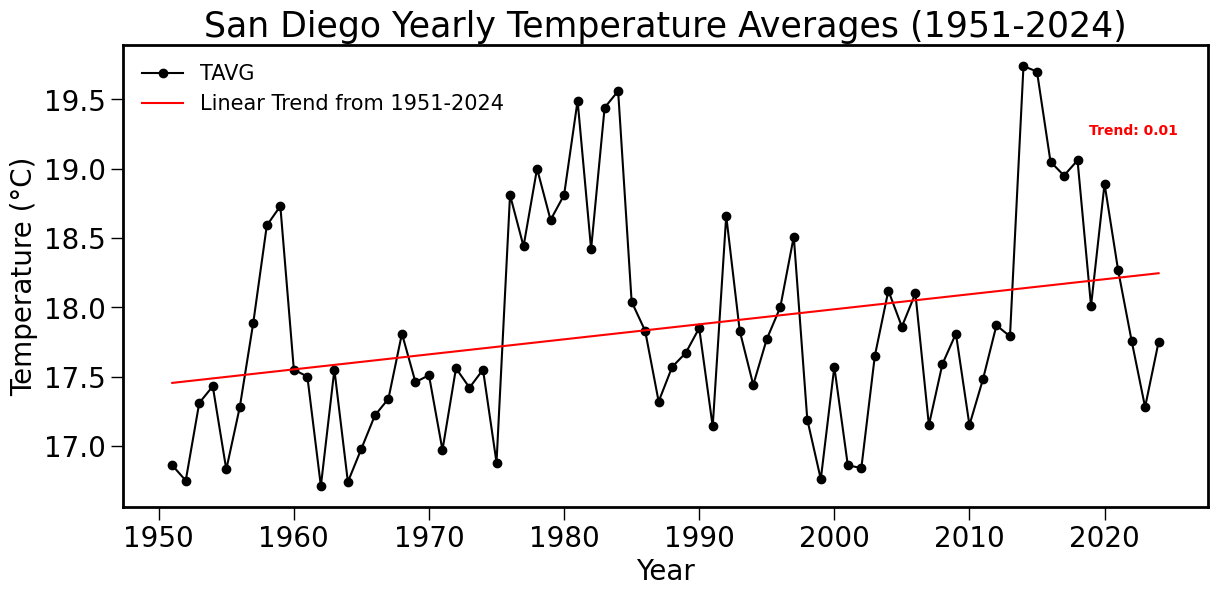

In [127]:
#SD['TAVG'] = pd.to_numeric(SD['AVG'], errors='coerce')
YEARS = np.linspace(1951, 2024, 74)
SDtavg = SDtavg
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SDtavg, 'k-o', label='TAVG')
TAVG_ltl(SD, 1951, 2024, 'red')
plt.title('San Diego Yearly Temperature Averages (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

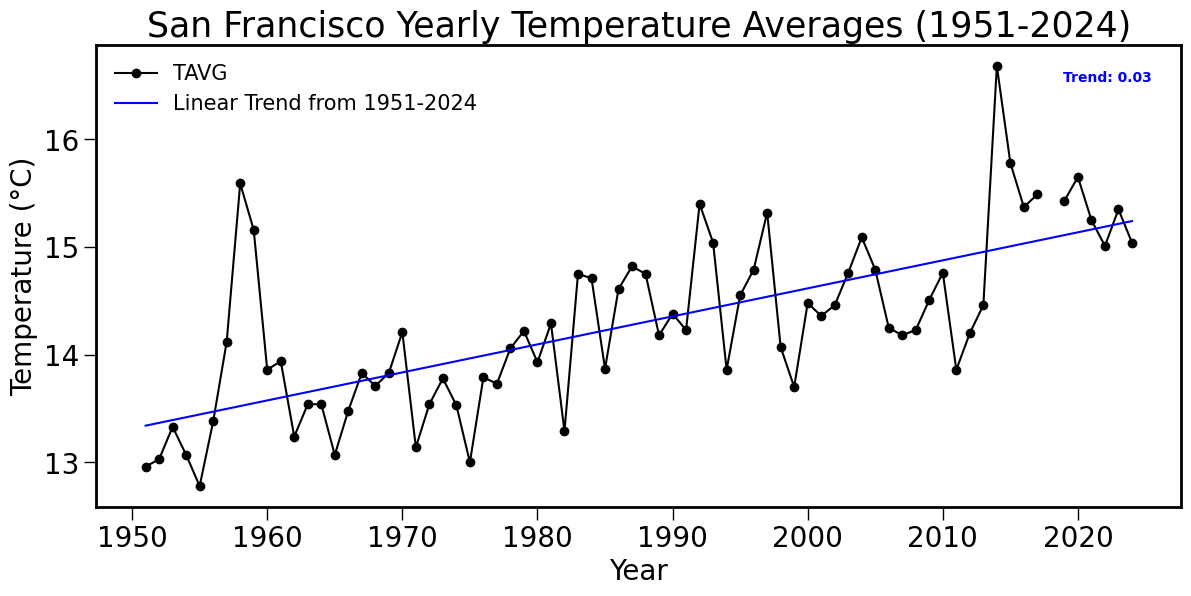

In [128]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SFtavg, 'k-o', label='TAVG')
TAVG_ltl(SF, 1951, 2024, 'blue')
plt.title('San Francisco Yearly Temperature Averages (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

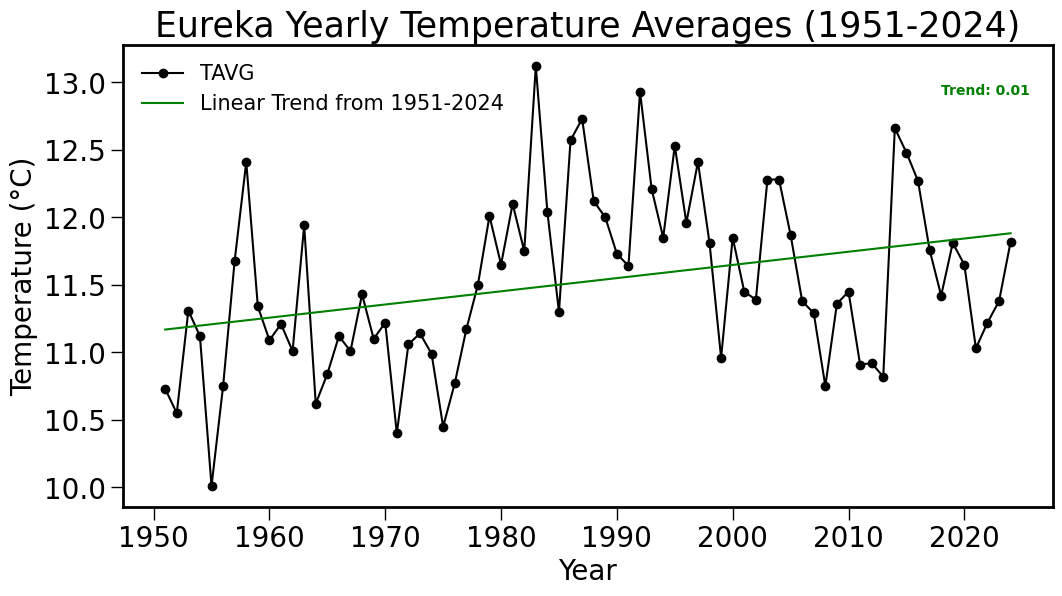

In [129]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(12, 6))
plt.plot(YEARS, EUtavg, 'k-o', label='TAVG')
TAVG_ltl(EU, 1951, 2024, 'green')
plt.title('Eureka Yearly Temperature Averages (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# **Yearly Average MAX Temperature**

Graphs and Trends

In [59]:
SDmtrends = {}
SFmtrends = {}
EUmtrends = {}
for start, end in [(1951, 2024)]:
    SDTmax_Trend = TMAX_Trend(SD, start, end)
    SFTmax_Trend = TMAX_Trend(SF, start, end)
    EUTmax_Trend = TMAX_Trend(EU, start, end)
    SDmtrends[f'{start}-{end}'] = SDTmax_Trend
    SFmtrends[f'{start}-{end}'] = SFTmax_Trend
    EUmtrends[f'{start}-{end}'] = EUTmax_Trend
for period, trend in SDmtrends.items():
  print(f'Temporal trend of TMAX in San Diego per decade for {period}: {trend:.4f} °C per year')
for period, trend in SFmtrends.items():
  print(f'Temporal trend of TMAX in San Francisco per decade for {period}: {trend:.4f} °C per year')
for period, trend in EUmtrends.items():
  print(f'Temporal trend of TMAX in Eureka per decade for {period}: {trend:.4f} °C per year')

Temporal trend of TMAX in San Diego per decade for 1951-2024: 0.0014 °C per year
Temporal trend of TMAX in San Francisco per decade for 1951-2024: 0.0170 °C per year
Temporal trend of TMAX in Eureka per decade for 1951-2024: 0.0236 °C per year


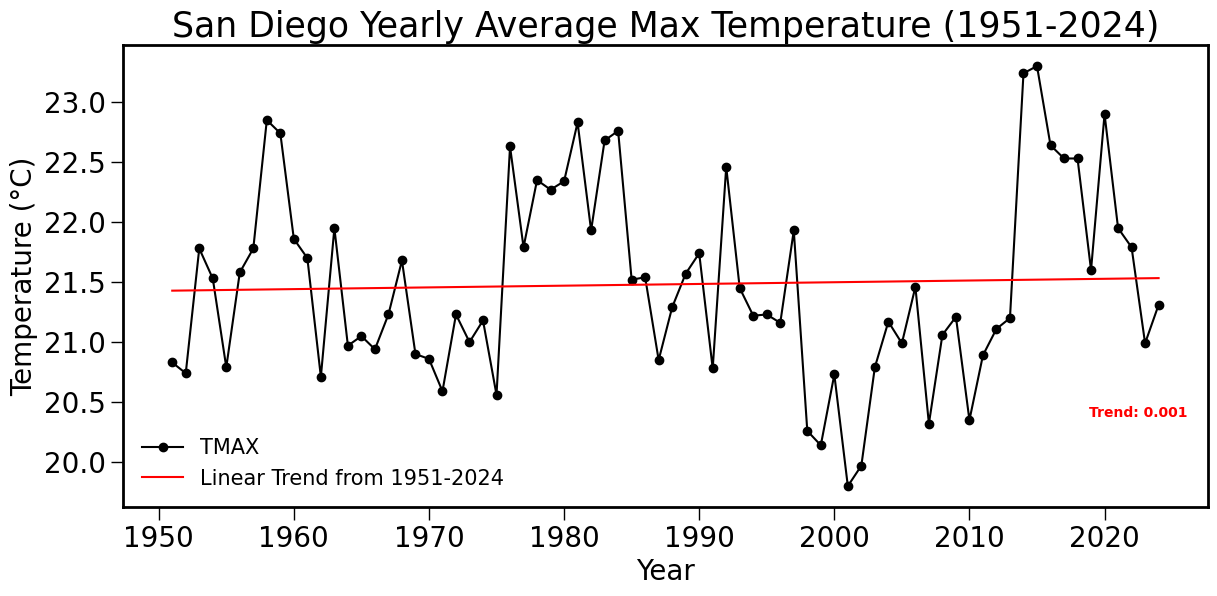

In [151]:
YEARS = np.linspace(1951, 2024, 74)
SDtmax = SDtmax
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SDtmax, 'k-o', label='TMAX')
TMAX_ltl(SD, 1951, 2024, 'red')
plt.title('San Diego Yearly Average Max Temperature (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

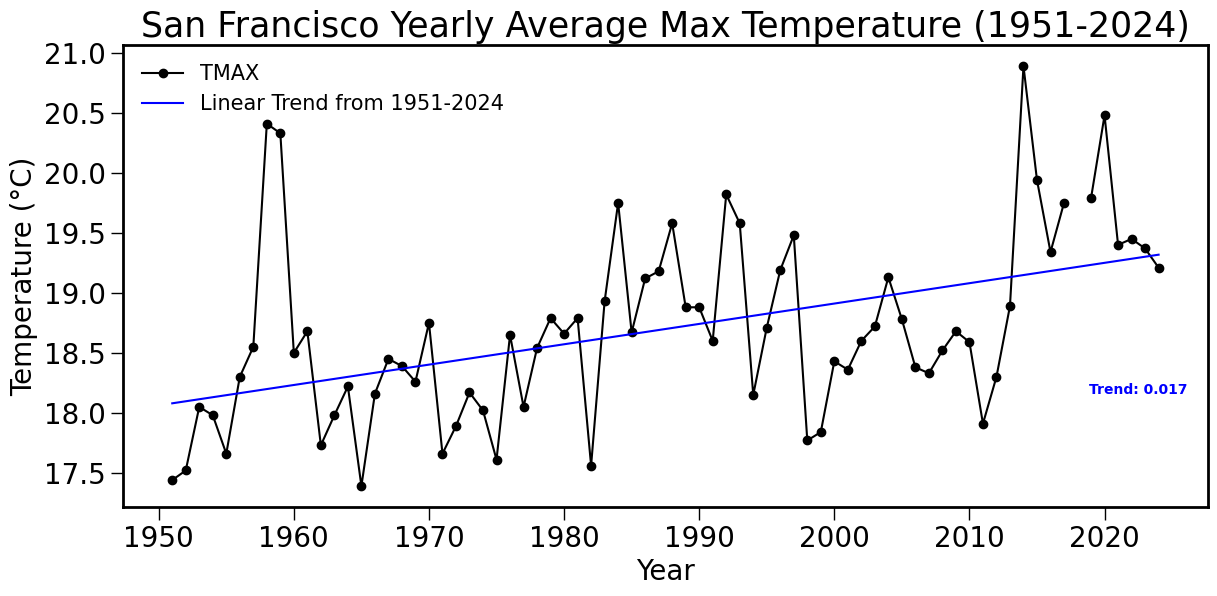

In [150]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SFtmax, 'k-o', label='TMAX')
TMAX_ltl(SF, 1951, 2024, 'blue')
plt.title('San Francisco Yearly Average Max Temperature (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

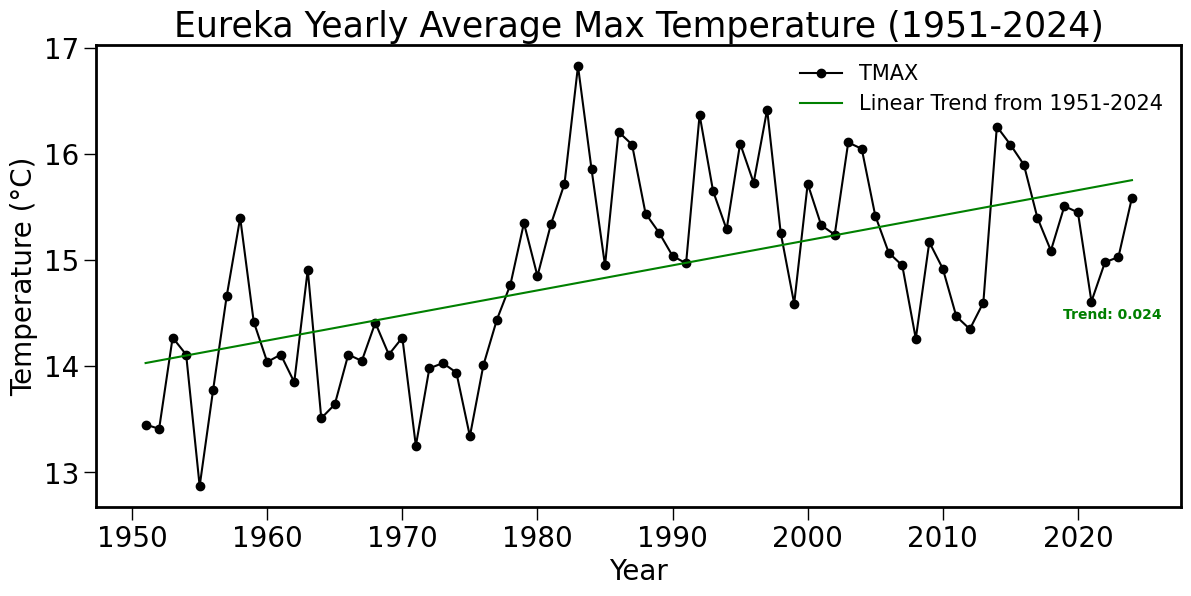

In [149]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, EUtmax, 'k-o', label='TMAX')
TMAX_ltl(EU, 1951, 2024, 'green')
plt.title('Eureka Yearly Average Max Temperature (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# **Yearly Precipitation Totals**

Graphs and Trends

In [89]:
SDptrends = {}
SFptrends = {}
EUptrends = {}
for start, end in [(1951, 2024)]:
    SDp_Trend = PRCP_Trend(SD, start, end)
    SFp_Trend = PRCP_Trend(SF, start, end)
    EUp_Trend = PRCP_Trend(EU, start, end)
    SDptrends[f'{start}-{end}'] = SDp_Trend
    SFptrends[f'{start}-{end}'] = SFp_Trend
    EUptrends[f'{start}-{end}'] = EUp_Trend
for period, trend in SDptrends.items():
  print(f'Temporal trend of Precipitation in San Diego per decade for {period}: {trend:.4f} °C per year')
for period, trend in SFptrends.items():
  print(f'Temporal trend of Precipitation in San Francisco per decade for {period}: {trend:.4f} °C per year')
for period, trend in EUptrends.items():
  print(f'Temporal trend of Precipitation in Eureka per decade for {period}: {trend:.4f} °C per year')

Temporal trend of Precipitation in San Diego per decade for 1951-2024: 0.1848 °C per year
Temporal trend of Precipitation in San Francisco per decade for 1951-2024: -0.5356 °C per year
Temporal trend of Precipitation in Eureka per decade for 1951-2024: 0.0951 °C per year


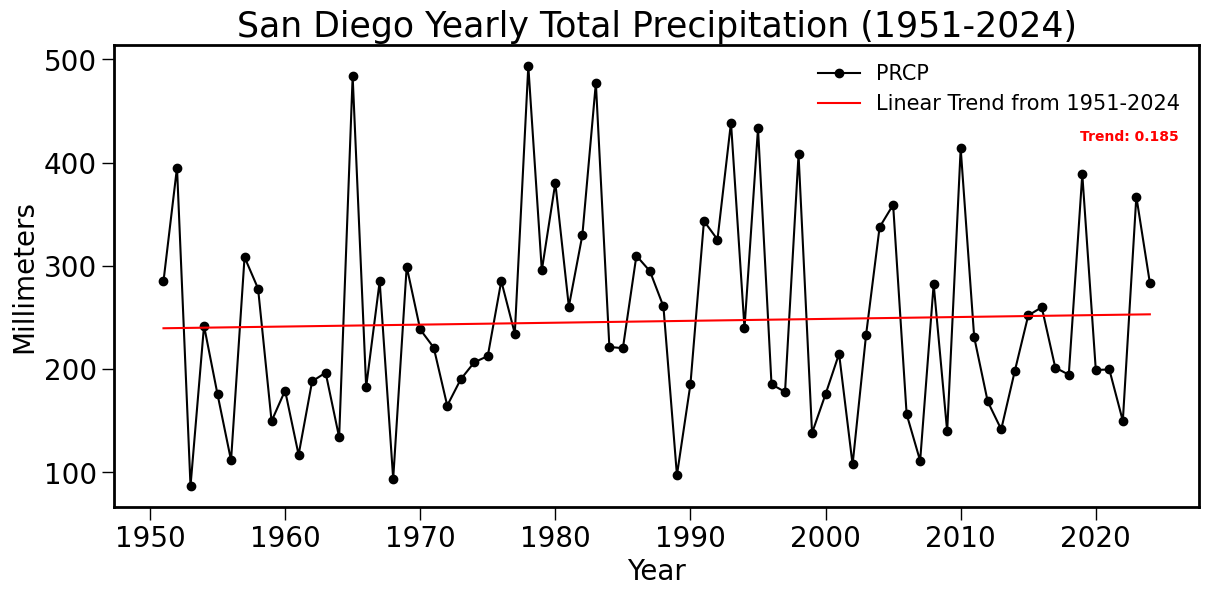

In [156]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SDprcp, 'k-o', label='PRCP')
PRCP_ltl(SD, 1951, 2024, 'red')
plt.title('San Diego Yearly Total Precipitation (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.legend()
plt.show()

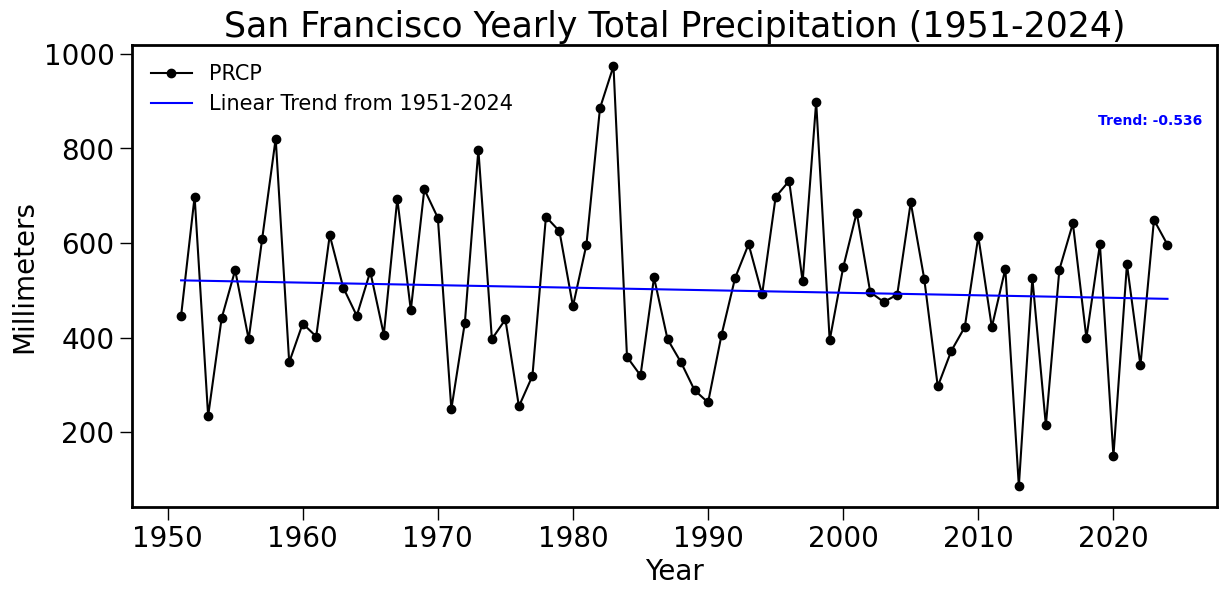

In [157]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SFprcp, 'k-o', label='PRCP')
PRCP_ltl(SF, 1951, 2024, 'blue')
plt.title('San Francisco Yearly Total Precipitation (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.legend()
plt.show()

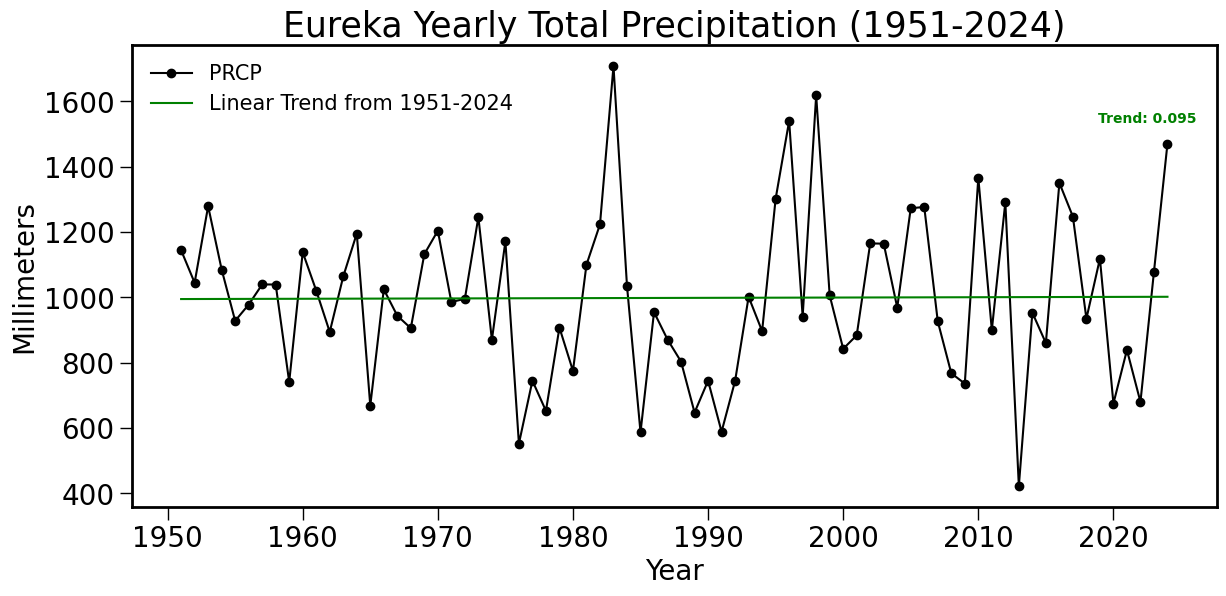

In [158]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, EUprcp, 'k-o', label='PRCP')
PRCP_ltl(EU, 1951, 2024, 'green')
plt.title('Eureka Yearly Total Precipitation (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.legend()
plt.show()

Sources:

California Air Resources Board, "Current California GHG Emission Inventory Data 2000–2022," 2024. [Online]. Available: https://ww2.arb.ca.gov/ghg-inventory-data

In [21]:
c2023 = datas + '2023.txt'
C2023 = pd.read_csv(c2023, sep='\s+', header=None)
c2024 =  datas + '2024.txt'
C2024 = pd.read_csv(c2024, sep='\s+', header=None)

In [36]:
Car2023 = C2023.iloc[1:, 1:].astype(float)
total_2023 = np.nansum(Car2023.to_numpy())
Car2024 = C2024.iloc[1:, 1:].astype(float)
total_2024 = np.nansum(Car2024.to_numpy())
print(f"Total emissions for 2023: {total_2023}")
print(f"Total emissions for 2024: {total_2024}")

Total emissions for 2023: 17.773000000000003
Total emissions for 2024: 18.56


In [9]:
Carbon = np.array([462.9, 477.8, 476.3, 478.1, 486.6, 477.7, 476.5, 484.8, 478.8, 450.3, 442.5, 437.4, 435.5, 431.4, 428.1, 426.8, 414.1, 410.3, 410.5, 403.7, 368.5, 380.4, 371.1])

In [1]:
x = np.linspace(2000,2022,23)

# Fit a linear trend line (1st degree polynomial)
slope, intercept = np.polyfit(x, Carbon, 1)

# Compute trend line
trend_line = slope * x + intercept

# Print results
print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}")

# Optional: plot the result
plt.plot(x, Carbon, label='Original Data')
plt.plot(x, trend_line, color='red', linestyle='--', label='Linear Trend')
plt.xlabel('Time Step [year]')
plt.ylabel('Carbon [million metric tons]')
plt.legend()
plt.title('Linear Trend of Carbon Emissions since 2000')
plt.show()

NameError: name 'np' is not defined